# Exploratory Data Analysis. Eda

## Set CD to Root

In [5]:
import os
from pathlib import Path
print("Directorio actual:", os.getcwd())

current_dir = Path.cwd()
project_root = current_dir
while not (project_root / '.git').exists() and project_root != project_root.parent:
    project_root = project_root.parent
    os.chdir("..")

print(f"Raíz del proyecto: {project_root}")
print("CWD cambiado a raíz del proyecto")


Directorio actual: /home/ferrus/Documents/university/semester_x/MA2003B/PROYECTO_MA2003B
Raíz del proyecto: /home/ferrus/Documents/university/semester_x/MA2003B/PROYECTO_MA2003B
CWD cambiado a raíz del proyecto


## Read

In [2]:
import pandas as pd

path_master_table = 'data/processed/master_table.csv'
df_master_table = pd.read_csv(path_master_table)

In [3]:
df_master_table.columns

Index(['date_index', 'co', 'no', 'no2', 'nox', 'o3', 'pm10', 'pm2.5', 'prs',
       'rainf', 'rh', 'so2', 'sr', 'tout', 'wsr', 'wdr', 'estacion',
       'archivo_origen'],
      dtype='object')

Iniciando EDA completo de Master Table...
Datos cargados: (386494, 18)
Rango temporal: 2022-01-01 00:00:00 a 2024-12-31 23:00:00
Estaciones: ['SURESTE' 'NOROESTE' 'NORESTE3' 'NORESTE2' 'NORTE2' 'NORESTE' 'SURESTE3'
 'SUR' 'SUROESTE2' 'NORTE' 'NOROESTE2' 'CENTRO' 'SUROESTE' 'SURESTE2'
 'NOROESTE3' 'NOROESTE 3' 'NORESTE 3' 'NORTE 2' 'NOROESTE 2' 'SURESTE 3'
 'suroeste' 'sureste' 'sureste 3' 'noreste 3' 'centro' 'sur' 'suroeste 2'
 'norte 2' 'noroeste 2' 'noreste 2' 'norte' 'noreste' 'noroeste'
 'sureste 2' 'noroeste 3']

ANÁLISIS TEMPORAL - SERIES DE TIEMPO

1. TENDENCIAS TEMPORALES GENERALES
----------------------------------------
co      : Media=1.36, Tendencia=-0.0000
no      : Media=11.85, Tendencia=0.0000
no2     : Media=15.25, Tendencia=-0.0000
nox     : Media=26.98, Tendencia=0.0000
o3      : Media=26.60, Tendencia=0.0000
pm10    : Media=60.91, Tendencia=-0.0001
pm2.5   : Media=20.33, Tendencia=-0.0001
prs     : Media=715.31, Tendencia=-0.0000
rainf   : Media=0.01, Tendencia=0.00

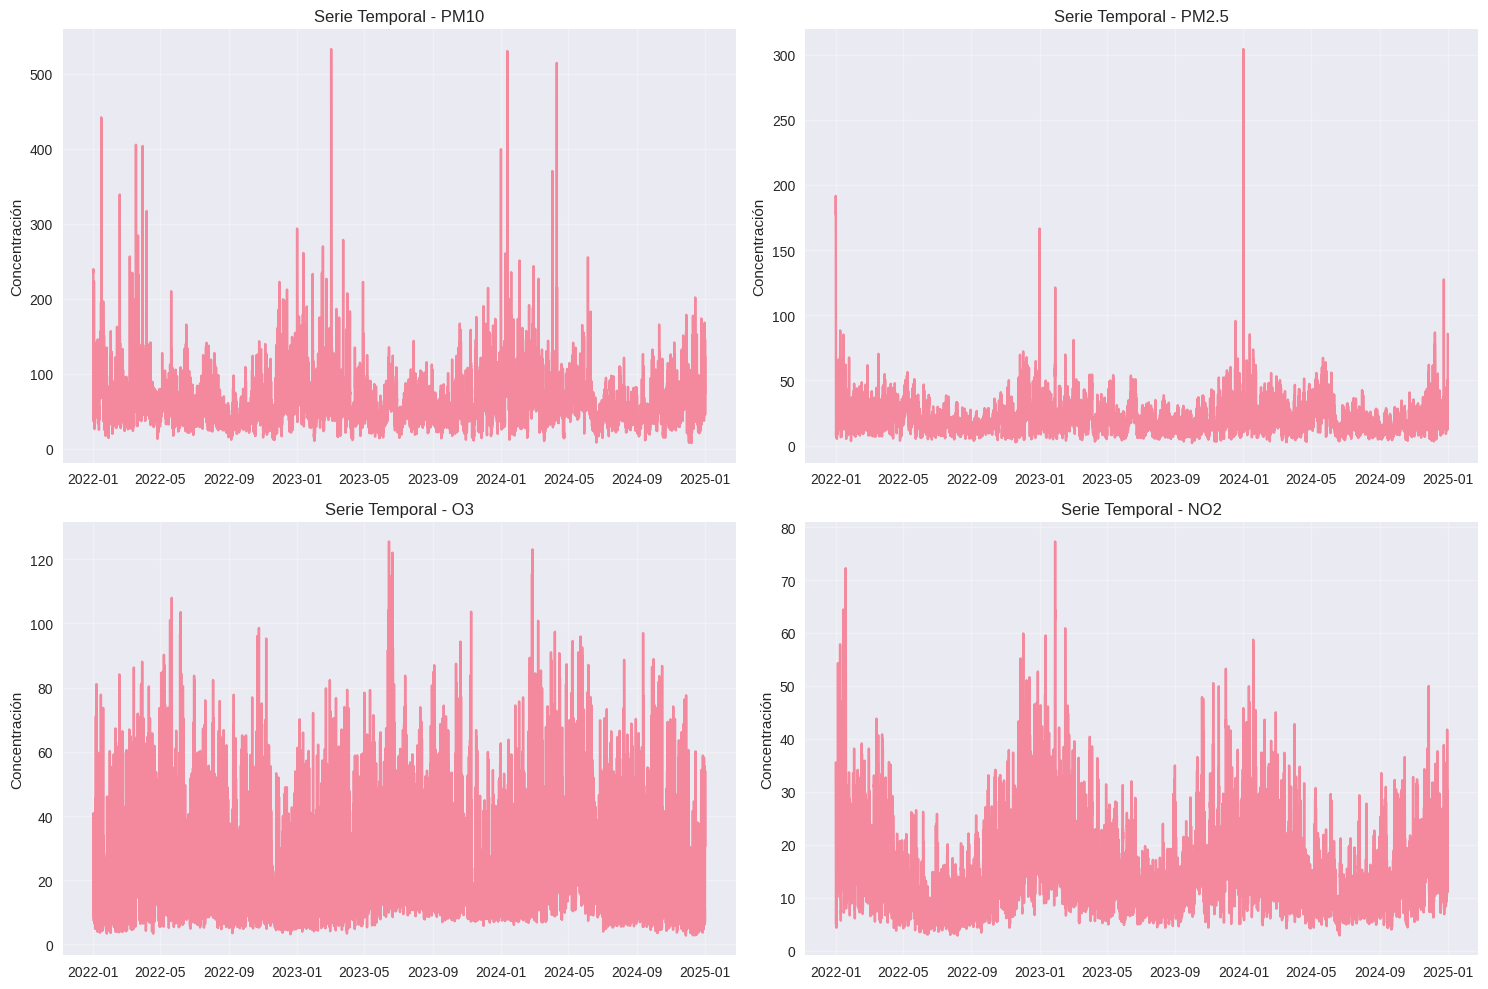

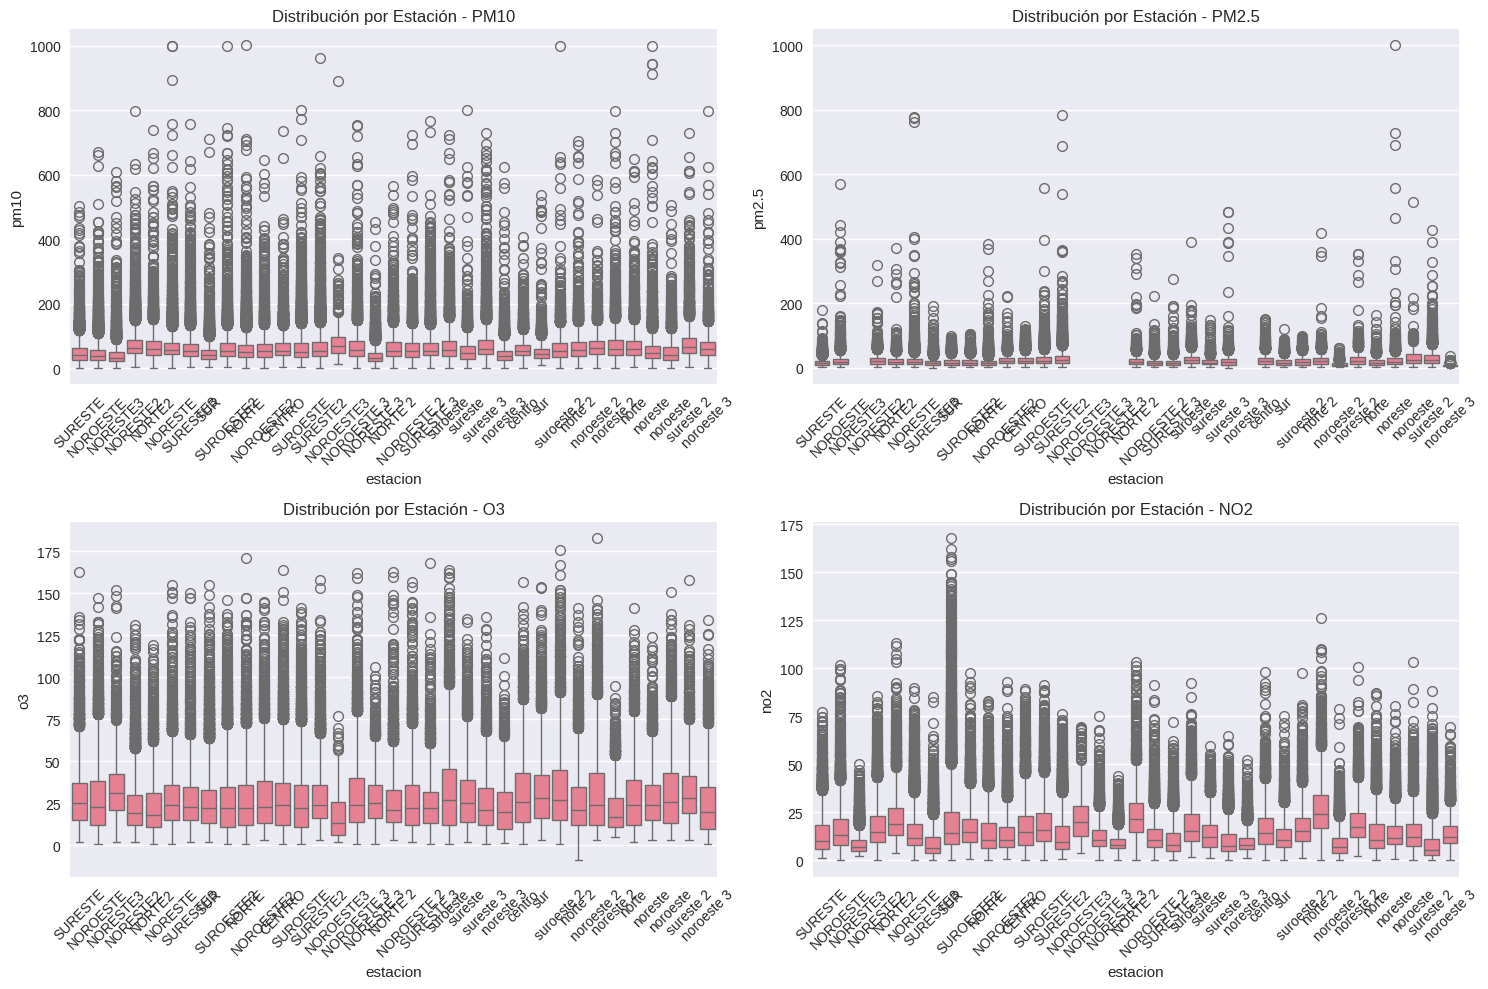

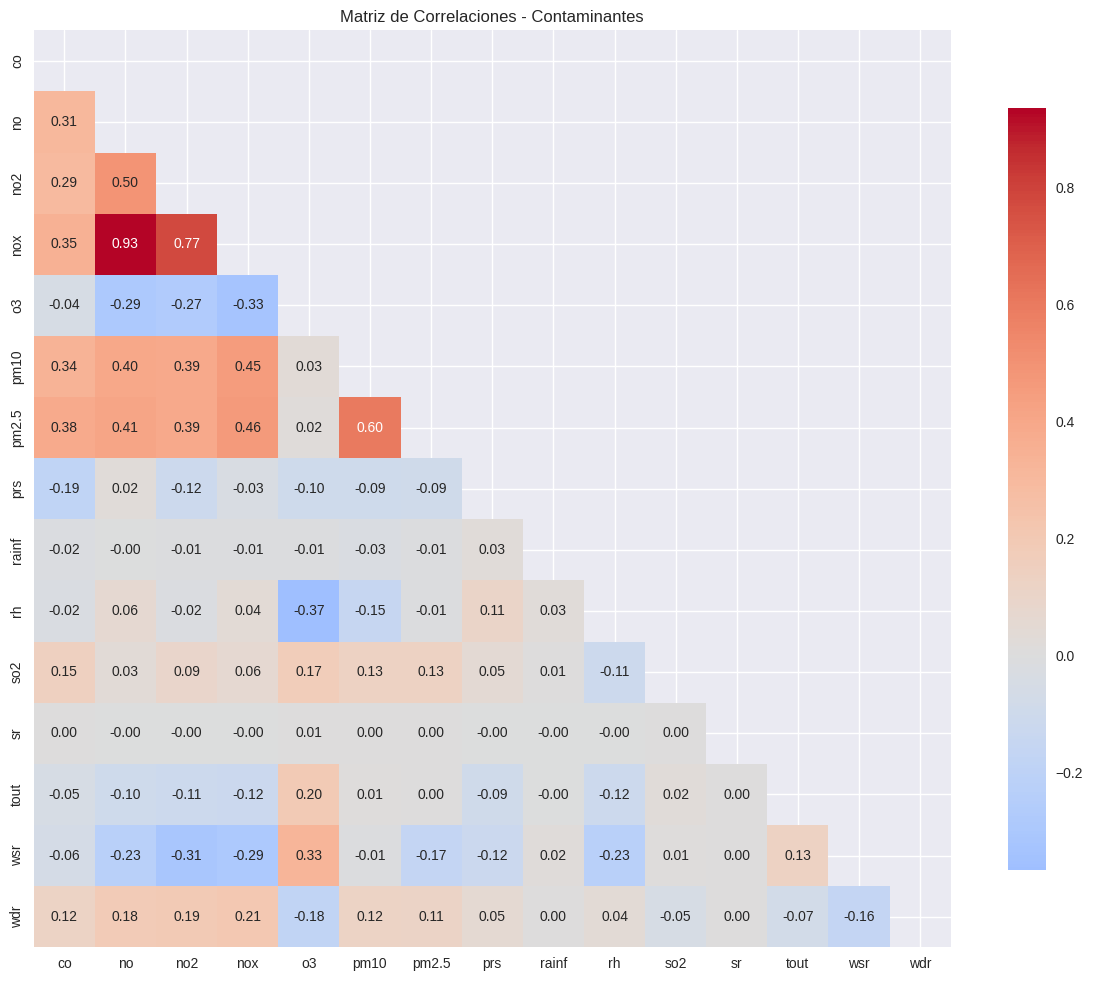

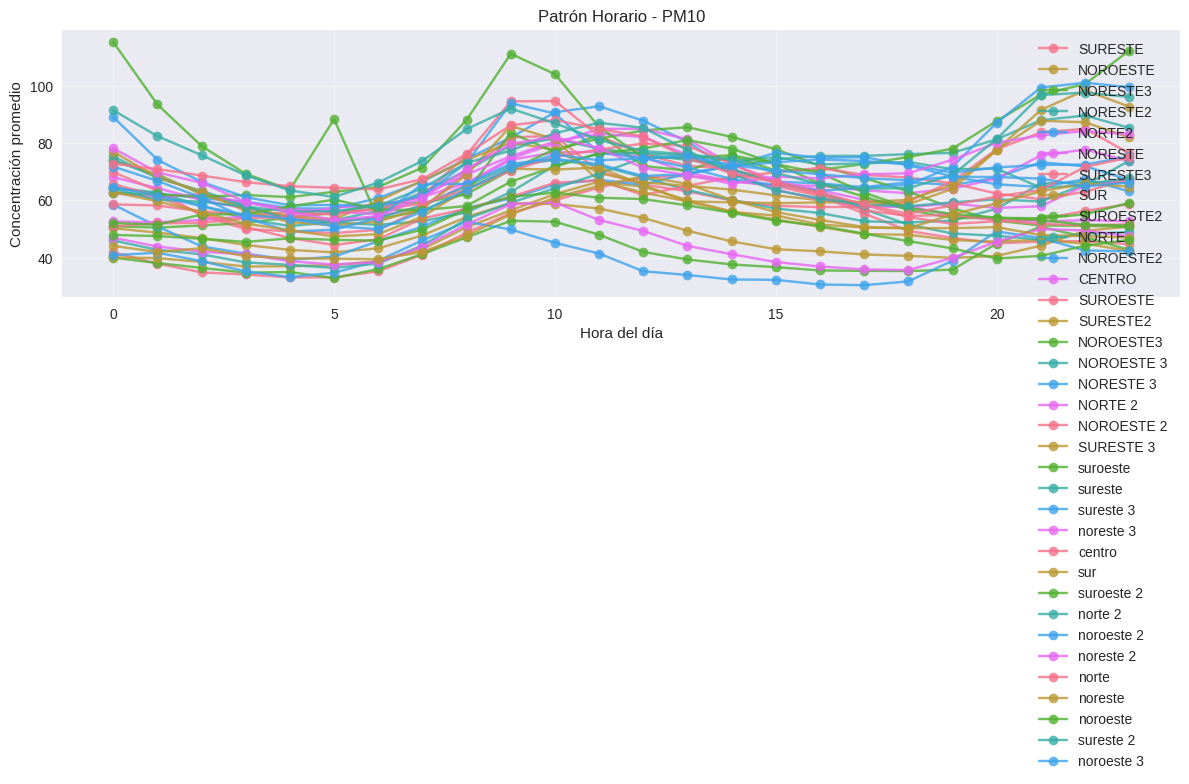


REPORTE EDA - MASTER TABLE ESTACIONES ITESM

DATOS GENERALES:
- Período analizado: 2022-01-01 00:00:00 a 2024-12-31 23:00:00
- Número de registros: 386,494
- Estaciones analizadas: SURESTE, NOROESTE, NORESTE3, NORESTE2, NORTE2, NORESTE, SURESTE3, SUR, SUROESTE2, NORTE, NOROESTE2, CENTRO, SUROESTE, SURESTE2, NOROESTE3, NOROESTE 3, NORESTE 3, NORTE 2, NOROESTE 2, SURESTE 3, suroeste, sureste, sureste 3, noreste 3, centro, sur, suroeste 2, norte 2, noroeste 2, noreste 2, norte, noreste, noroeste, sureste 2, noroeste 3
- Contaminantes analizados: 15

HALLAZGOS TEMPORALES PRINCIPALES:
- Contaminante más volátil: no (31.47%)
- Mayor correlación: no ↔ nox (0.952)

HALLAZGOS SECCIONALES PRINCIPALES:
- Estación con mayor PM10: NOROESTE3 (79.39)

--- ACCESO A RESULTADOS ESPECÍFICOS ---

Tendencias temporales:
  co: -0.000006
  no: 0.000041
  no2: -0.000018
  nox: 0.000018
  o3: 0.000029
  pm10: -0.000090
  pm2.5: -0.000059
  prs: -0.000049
  rainf: 0.000001
  rh: 0.000331
  so2: -0.000071
  sr:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
from typing import Dict, List, Tuple, Optional
from pathlib import Path
from scipy import stats

warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

class EDAMasterTable:
    """
    Clase para realizar EDA completo de la Master Table con enfoque temporal y seccional.
    """
    
    def __init__(self, path_master_table: str):
        """Inicializa y carga los datos con tipos corregidos."""
        self.path = path_master_table
        self.df = self._cargar_y_limpiar_datos()
        self.contaminantes = self._identificar_contaminantes()
        self.estaciones = self.df['estacion'].unique()
        self.resultados = {}
        
    def _cargar_y_limpiar_datos(self) -> pd.DataFrame:
        """Carga datos y corrige tipos."""
        df = pd.read_csv(self.path)
        
        # Corregir tipo de fecha
        df['date_index'] = pd.to_datetime(df['date_index'])
        
        # Verificar y limpiar datos
        print(f"Datos cargados: {df.shape}")
        print(f"Rango temporal: {df['date_index'].min()} a {df['date_index'].max()}")
        print(f"Estaciones: {df['estacion'].unique()}")
        
        return df
    
    def _identificar_contaminantes(self) -> List[str]:
        """Identifica columnas de contaminantes (numéricas, excluyendo metadatos)."""
        excluir = ['date_index', 'estacion', 'archivo_origen']
        contaminantes = [col for col in self.df.columns 
                        if col not in excluir and self.df[col].dtype in ['float64', 'int64']]
        return contaminantes
    
    def analisis_temporal_completo(self) -> Dict:
        """Análisis temporal completo de las series de tiempo."""
        print("\n" + "="*60)
        print("ANÁLISIS TEMPORAL - SERIES DE TIEMPO")
        print("="*60)
        
        resultados_temporales = {}
        
        # 1. TENDENCIAS TEMPORALES GENERALES
        print("\n1. TENDENCIAS TEMPORALES GENERALES")
        print("-"*40)
        
        # Agregar por tiempo (promedio de todas las estaciones)
        df_temporal = self.df.groupby('date_index')[self.contaminantes].mean()
        
        # Estadísticas temporales básicas
        for contaminante in self.contaminantes:
            serie = df_temporal[contaminante].dropna()
            if len(serie) > 0:
                tendencia = self._calcular_tendencia(serie)
                resultados_temporales[contaminante] = {
                    'media_global': serie.mean(),
                    'std_global': serie.std(),
                    'tendencia': tendencia,
                    'valores_extremos': {
                        'max': serie.max(),
                        'min': serie.min(),
                        'fecha_max': serie.idxmax(),
                        'fecha_min': serie.idxmin()
                    }
                }
                
                print(f"{contaminante:8}: Media={serie.mean():.2f}, Tendencia={tendencia:.4f}")
        
        # 2. PATRONES ESTACIONALES
        print("\n2. PATRONES ESTACIONALES")
        print("-"*40)
        
        estacionales = self._analizar_patrones_estacionales()
        resultados_temporales['patrones_estacionales'] = estacionales
        
        # 3. CORRELACIONES TEMPORALES
        print("\n3. CORRELACIONES TEMPORALES")
        print("-"*40)
        
        correlaciones = df_temporal[self.contaminantes].corr()
        # Mostrar correlaciones más altas
        correlaciones_altas = self._encontrar_correlaciones_altas(correlaciones)
        
        print("Correlaciones más significativas:")
        for par, corr in correlaciones_altas:
            print(f"  {par[0]} ↔ {par[1]}: {corr:.3f}")
        
        resultados_temporales['correlaciones'] = correlaciones_altas
        
        # 4. VOLATILIDAD TEMPORAL
        print("\n4. VOLATILIDAD TEMPORAL")
        print("-"*40)
        
        volatilidad = self._calcular_volatilidad_temporal()
        resultados_temporales['volatilidad'] = volatilidad
        
        self.resultados['temporal'] = resultados_temporales
        return resultados_temporales
    
    def analisis_seccional_completo(self) -> Dict:
        """Análisis seccional agrupando por estaciones."""
        print("\n" + "="*60)
        print("ANÁLISIS SECCIONAL - POR ESTACIONES")
        print("="*60)
        
        resultados_seccionales = {}
        
        # 1. ESTADÍSTICAS POR ESTACIÓN
        print("\n1. ESTADÍSTICAS DESCRIPTIVAS POR ESTACIÓN")
        print("-"*50)
        
        stats_estaciones = {}
        for estacion in self.estaciones:
            df_estacion = self.df[self.df['estacion'] == estacion]
            stats = {}
            
            for contaminante in self.contaminantes:
                serie = df_estacion[contaminante].dropna()
                if len(serie) > 0:
                    stats[contaminante] = {
                        'media': serie.mean(),
                        'mediana': serie.median(),
                        'std': serie.std(),
                        'cv': serie.std() / serie.mean() if serie.mean() != 0 else np.nan,
                        'percentil_95': serie.quantile(0.95),
                        'datos_validos': len(serie),
                        'completitud': len(serie) / len(df_estacion) * 100
                    }
            
            stats_estaciones[estacion] = stats
            print(f"\n{estacion}:")
            print(f"  Registros: {len(df_estacion)}")
            print(f"  Período: {df_estacion['date_index'].min()} a {df_estacion['date_index'].max()}")
        
        resultados_seccionales['estadisticas_estaciones'] = stats_estaciones
        
        # 2. RANKING DE ESTACIONES POR CONTAMINANTE
        print("\n2. RANKING DE ESTACIONES POR CONTAMINANTE")
        print("-"*45)
        
        rankings = self._crear_rankings_estaciones()
        resultados_seccionales['rankings'] = rankings
        
        # 3. DIFERENCIAS SIGNIFICATIVAS ENTRE ESTACIONES
        print("\n3. DIFERENCIAS ENTRE ESTACIONES")
        print("-"*35)
        
        diferencias = self._analizar_diferencias_estaciones()
        resultados_seccionales['diferencias'] = diferencias
        
        # 4. PATRONES ÚNICOS POR ESTACIÓN
        print("\n4. PATRONES ÚNICOS POR ESTACIÓN")
        print("-"*35)
        
        patrones_unicos = self._identificar_patrones_unicos()
        resultados_seccionales['patrones_unicos'] = patrones_unicos
        
        self.resultados['seccional'] = resultados_seccionales
        return resultados_seccionales
    
    def _calcular_tendencia(self, serie: pd.Series) -> float:
        """Calcula la tendencia lineal de una serie temporal."""
        if len(serie) < 2:
            return 0.0
        
        x = np.arange(len(serie))
        y = serie.values
        
        # Regresión lineal simple
        mask = ~np.isnan(y)
        if mask.sum() < 2:
            return 0.0
            
        slope = np.polyfit(x[mask], y[mask], 1)[0]
        return slope
    
    def _analizar_patrones_estacionales(self) -> Dict:
        """Analiza patrones por hora, día, mes."""
        df_temp = self.df.copy()
        df_temp['hora'] = df_temp['date_index'].dt.hour
        df_temp['dia_semana'] = df_temp['date_index'].dt.dayofweek
        df_temp['mes'] = df_temp['date_index'].dt.month
        
        patrones = {}
        
        # Patrón por hora del día
        patron_horario = df_temp.groupby('hora')[self.contaminantes].mean()
        contaminante_max_variacion_hora = patron_horario.std().idxmax()
        hora_pico = patron_horario[contaminante_max_variacion_hora].idxmax()
        
        patrones['horario'] = {
            'contaminante_max_variacion': contaminante_max_variacion_hora,
            'hora_pico': hora_pico,
            'patron_completo': patron_horario
        }
        
        # Patrón por día de la semana
        patron_semanal = df_temp.groupby('dia_semana')[self.contaminantes].mean()
        
        patrones['semanal'] = patron_semanal
        
        # Patrón por mes
        patron_mensual = df_temp.groupby('mes')[self.contaminantes].mean()
        
        patrones['mensual'] = patron_mensual
        
        print(f"Máxima variación horaria: {contaminante_max_variacion_hora} (pico a las {hora_pico}:00)")
        
        return patrones
    
    def _encontrar_correlaciones_altas(self, correlaciones: pd.DataFrame, umbral: float = 0.7) -> List[Tuple]:
        """Encuentra correlaciones altas entre contaminantes."""
        correlaciones_altas = []
        
        for i in range(len(correlaciones.columns)):
            for j in range(i+1, len(correlaciones.columns)):
                corr = correlaciones.iloc[i, j]
                if abs(corr) >= umbral:
                    correlaciones_altas.append(
                        ((correlaciones.columns[i], correlaciones.columns[j]), corr)
                    )
        
        # Ordenar por correlación absoluta
        correlaciones_altas.sort(key=lambda x: abs(x[1]), reverse=True)
        return correlaciones_altas[:10]  # Top 10
    
    def _calcular_volatilidad_temporal(self) -> Dict:
        """Calcula volatilidad (variabilidad) temporal."""
        df_temporal = self.df.groupby('date_index')[self.contaminantes].mean()
        
        volatilidad = {}
        for contaminante in self.contaminantes:
            serie = df_temporal[contaminante].dropna()
            if len(serie) > 1:
                # Volatilidad como desviación estándar de cambios porcentuales
                cambios = serie.pct_change().dropna()
                vol = cambios.std() * 100  # En porcentaje
                volatilidad[contaminante] = vol
        
        # Ordenar por volatilidad
        volatilidad_ordenada = dict(sorted(volatilidad.items(), key=lambda x: x[1], reverse=True))
        
        print("Contaminantes más volátiles:")
        for cont, vol in list(volatilidad_ordenada.items())[:5]:
            print(f"  {cont}: {vol:.2f}%")
        
        return volatilidad_ordenada
    
    def _crear_rankings_estaciones(self) -> Dict:
        """Crea rankings de estaciones por cada contaminante."""
        rankings = {}
        
        for contaminante in self.contaminantes:
            ranking_cont = []
            for estacion in self.estaciones:
                df_est = self.df[self.df['estacion'] == estacion]
                media = df_est[contaminante].mean()
                if not np.isnan(media):
                    ranking_cont.append((estacion, media))
            
            # Ordenar por media (mayor a menor)
            ranking_cont.sort(key=lambda x: x[1], reverse=True)
            rankings[contaminante] = ranking_cont
            
            print(f"\n{contaminante}:")
            for i, (est, media) in enumerate(ranking_cont[:3]):
                print(f"  {i+1}. {est}: {media:.2f}")
        
        return rankings
    
    def _analizar_diferencias_estaciones(self) -> Dict:
        """Analiza diferencias estadísticamente significativas entre estaciones."""
        
        diferencias = {}
        
        for contaminante in self.contaminantes:
            # Obtener datos por estación
            datos_estaciones = []
            nombres_estaciones = []
            
            for estacion in self.estaciones:
                datos = self.df[self.df['estacion'] == estacion][contaminante].dropna()
                if len(datos) > 10:  # Mínimo 10 observaciones
                    datos_estaciones.append(datos)
                    nombres_estaciones.append(estacion)
            
            if len(datos_estaciones) >= 2:
                # Test ANOVA para diferencias entre grupos
                try:
                    f_stat, p_value = stats.f_oneway(*datos_estaciones)
                    diferencias[contaminante] = {
                        'f_statistic': f_stat,
                        'p_value': p_value,
                        'significativo': p_value < 0.05,
                        'estaciones_analizadas': nombres_estaciones
                    }
                    
                    if p_value < 0.05:
                        print(f"{contaminante}: Diferencias significativas (p={p_value:.4f})")
                
                except Exception:
                    pass
        
        return diferencias
    
    def _identificar_patrones_unicos(self) -> Dict:
        """Identifica patrones únicos de cada estación."""
        patrones = {}
        
        for estacion in self.estaciones:
            df_est = self.df[self.df['estacion'] == estacion].copy()
            
            if len(df_est) < 100:  # Muy pocos datos
                continue
            
            # Calcular características únicas
            caracteristicas = {}
            
            for contaminante in self.contaminantes:
                serie = df_est[contaminante].dropna()
                if len(serie) > 0:
                    # Métricas específicas
                    caracteristicas[contaminante] = {
                        'eventos_extremos': len(serie[serie > serie.quantile(0.95)]),
                        'estabilidad': 1 / (serie.std() / serie.mean()) if serie.mean() != 0 else 0,
                        'asimetria': stats.skew(serie),
                        'curtosis': stats.kurtosis(serie)
                    }
            
            patrones[estacion] = caracteristicas
            
            # Identificar la característica más distintiva
            if caracteristicas:
                print(f"\n{estacion}:")
                # Ejemplo: mostrar contaminante con más eventos extremos
                max_extremos = max(caracteristicas.items(), 
                                 key=lambda x: x[1].get('eventos_extremos', 0))
                print(f"  Más eventos extremos: {max_extremos[0]} ({max_extremos[1]['eventos_extremos']} eventos)")
        
        return patrones
    
    def generar_visualizaciones(self, guardar: bool = True) -> None:
        """Genera visualizaciones clave del EDA."""
        print("\n" + "="*60)
        print("GENERANDO VISUALIZACIONES")
        print("="*60)
        
        fig_folder = Path('reports/figures') if guardar else None
        if guardar:
            fig_folder.mkdir(parents=True, exist_ok=True)
        
        # 1. Series temporales principales
        self._plot_series_temporales(fig_folder)
        
        # 2. Comparación entre estaciones
        self._plot_comparacion_estaciones(fig_folder)
        
        # 3. Correlaciones
        self._plot_correlaciones(fig_folder)
        
        # 4. Patrones estacionales
        self._plot_patrones_estacionales(fig_folder)
        
        plt.show()
    
    def _plot_series_temporales(self, fig_folder: Optional[Path]) -> None:
        """Gráficos de series temporales."""
        # Top 4 contaminantes más importantes
        contaminantes_principales = ['pm10', 'pm2.5', 'o3', 'no2']
        contaminantes_plot = [c for c in contaminantes_principales if c in self.contaminantes]
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        axes = axes.ravel()
        
        df_temporal = self.df.groupby('date_index')[self.contaminantes].mean()
        
        for i, contaminante in enumerate(contaminantes_plot[:4]):
            if contaminante in df_temporal.columns:
                axes[i].plot(df_temporal.index, df_temporal[contaminante], alpha=0.8)
                axes[i].set_title(f'Serie Temporal - {contaminante.upper()}')
                axes[i].set_ylabel('Concentración')
                axes[i].grid(True, alpha=0.3)
        
        plt.tight_layout()
        if fig_folder:
            plt.savefig(fig_folder / 'series_temporales.png', dpi=300, bbox_inches='tight')
    
    def _plot_comparacion_estaciones(self, fig_folder: Optional[Path]) -> None:
        """Comparación entre estaciones."""
        # Boxplots por estación para contaminantes principales
        contaminantes_principales = ['pm10', 'pm2.5', 'o3', 'no2']
        contaminantes_plot = [c for c in contaminantes_principales if c in self.contaminantes]
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        axes = axes.ravel()
        
        for i, contaminante in enumerate(contaminantes_plot[:4]):
            sns.boxplot(data=self.df, x='estacion', y=contaminante, ax=axes[i])
            axes[i].set_title(f'Distribución por Estación - {contaminante.upper()}')
            axes[i].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        if fig_folder:
            plt.savefig(fig_folder / 'comparacion_estaciones.png', dpi=300, bbox_inches='tight')
    
    def _plot_correlaciones(self, fig_folder: Optional[Path]) -> None:
        """Matriz de correlaciones."""
        plt.figure(figsize=(12, 10))
        correlaciones = self.df[self.contaminantes].corr()
        
        mask = np.triu(np.ones_like(correlaciones, dtype=bool))
        sns.heatmap(correlaciones, mask=mask, annot=True, cmap='coolwarm', center=0,
                   fmt='.2f', square=True, cbar_kws={"shrink": .8})
        plt.title('Matriz de Correlaciones - Contaminantes')
        plt.tight_layout()
        
        if fig_folder:
            plt.savefig(fig_folder / 'correlaciones.png', dpi=300, bbox_inches='tight')
    
    def _plot_patrones_estacionales(self, fig_folder: Optional[Path]) -> None:
        """Patrones estacionales."""
        df_temp = self.df.copy()
        df_temp['hora'] = df_temp['date_index'].dt.hour
        
        # Patrón horario para PM10 (ejemplo)
        contaminante_ejemplo = 'pm10' if 'pm10' in self.contaminantes else self.contaminantes[0]
        
        plt.figure(figsize=(12, 6))
        
        # Por estación
        for estacion in self.estaciones:
            df_est = df_temp[df_temp['estacion'] == estacion]
            patron_horario = df_est.groupby('hora')[contaminante_ejemplo].mean()
            plt.plot(patron_horario.index, patron_horario.values, 
                    marker='o', label=estacion, alpha=0.8)
        
        plt.title(f'Patrón Horario - {contaminante_ejemplo.upper()}')
        plt.xlabel('Hora del día')
        plt.ylabel('Concentración promedio')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        
        if fig_folder:
            plt.savefig(fig_folder / 'patrones_horarios.png', dpi=300, bbox_inches='tight')
    
    def generar_reporte_completo(self) -> str:
        """Genera reporte textual completo del EDA."""
        reporte = []
        reporte.append("="*80)
        reporte.append("REPORTE EDA - MASTER TABLE ESTACIONES ITESM")
        reporte.append("="*80)
        
        # Resumen general
        reporte.append(f"\nDATOS GENERALES:")
        reporte.append(f"- Período analizado: {self.df['date_index'].min()} a {self.df['date_index'].max()}")
        reporte.append(f"- Número de registros: {len(self.df):,}")
        reporte.append(f"- Estaciones analizadas: {', '.join(self.estaciones)}")
        reporte.append(f"- Contaminantes analizados: {len(self.contaminantes)}")
        
        # Hallazgos principales temporales
        if 'temporal' in self.resultados:
            reporte.append(f"\nHALLAZGOS TEMPORALES PRINCIPALES:")
            temp_results = self.resultados['temporal']
            
            if 'volatilidad' in temp_results:
                vol_max = list(temp_results['volatilidad'].items())[0]
                reporte.append(f"- Contaminante más volátil: {vol_max[0]} ({vol_max[1]:.2f}%)")
            
            if 'correlaciones' in temp_results and temp_results['correlaciones']:
                corr_max = temp_results['correlaciones'][0]
                reporte.append(f"- Mayor correlación: {corr_max[0][0]} ↔ {corr_max[0][1]} ({corr_max[1]:.3f})")
        
        # Hallazgos principales seccionales
        if 'seccional' in self.resultados:
            reporte.append(f"\nHALLAZGOS SECCIONALES PRINCIPALES:")
            secc_results = self.resultados['seccional']
            
            if 'rankings' in secc_results and 'pm10' in secc_results['rankings']:
                pm10_ranking = secc_results['rankings']['pm10']
                if pm10_ranking:
                    reporte.append(f"- Estación con mayor PM10: {pm10_ranking[0][0]} ({pm10_ranking[0][1]:.2f})")
        
        return "\n".join(reporte)

# FUNCIÓN PRINCIPAL PARA EJECUTAR TODO EL EDA
def ejecutar_eda_completo(path_master_table: str = 'data/processed/master_table.csv') -> EDAMasterTable:
    """
    Ejecuta el EDA completo de la master table.
    
    Returns:
        EDAMasterTable: Objeto con todos los resultados del análisis
    """
    print("Iniciando EDA completo de Master Table...")
    
    # Crear objeto EDA
    eda = EDAMasterTable(path_master_table)
    
    # Ejecutar análisis
    eda.analisis_temporal_completo()
    eda.analisis_seccional_completo()
    
    # Generar visualizaciones
    eda.generar_visualizaciones(guardar=True)
    
    # Mostrar reporte final
    print("\n" + eda.generar_reporte_completo())
    
    return eda

# EJEMPLO DE USO
if __name__ == "__main__":
    # Ejecutar EDA completo
    eda_resultado = ejecutar_eda_completo(path_master_table)
    
    # Acceder a resultados específicos
    print("\n--- ACCESO A RESULTADOS ESPECÍFICOS ---")
    
    # Tendencias temporales
    if 'temporal' in eda_resultado.resultados:
        print("\nTendencias temporales:")
        for contaminante, datos in eda_resultado.resultados['temporal'].items():
            if isinstance(datos, dict) and 'tendencia' in datos:
                print(f"  {contaminante}: {datos['tendencia']:.6f}")
    
    # Rankings por estación
    if 'seccional' in eda_resultado.resultados and 'rankings' in eda_resultado.resultados['seccional']:
        print("\nRankings por estación (PM10):")
        pm10_ranking = eda_resultado.resultados['seccional']['rankings'].get('pm10', [])
        for i, (estacion, valor) in enumerate(pm10_ranking):
            print(f"  {i+1}. {estacion}: {valor:.2f}")

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from typing import Dict, List

def limpiar_nombres_estaciones(df: pd.DataFrame) -> pd.DataFrame:
    """
    Limpia y estandariza los nombres de estaciones.
    """
    df_clean = df.copy()
    
    # Mapeo para limpiar nombres de estaciones
    mapeo_estaciones = {
        # Variaciones de SURESTE
        'SURESTE': 'SURESTE',
        'SURESTE2': 'SURESTE', 
        'SURESTE3': 'SURESTE',
        'SURESTE 2': 'SURESTE',
        'SURESTE 3': 'SURESTE',
        'sureste': 'SURESTE',
        'sureste 2': 'SURESTE',
        'sureste 3': 'SURESTE',
        'SUR': 'SURESTE',
        'sur': 'SURESTE',
        
        # Variaciones de NORESTE
        'NORESTE': 'NORESTE',
        'NORESTE2': 'NORESTE',
        'NORESTE3': 'NORESTE', 
        'NORESTE 2': 'NORESTE',
        'NORESTE 3': 'NORESTE',
        'noreste': 'NORESTE',
        'noreste 2': 'NORESTE',
        'noreste 3': 'NORESTE',
        'NORTE': 'NORESTE',
        'NORTE2': 'NORESTE',
        'NORTE 2': 'NORESTE',
        'norte': 'NORESTE',
        'norte 2': 'NORESTE',
        'NOROESTE': 'NORESTE',
        'NOROESTE2': 'NORESTE',
        'noroeste': 'NORESTE',
        'noroeste 2': 'NORESTE',
        
        # Variaciones de CENTRO  
        'CENTRO': 'CENTRO',
        'centro': 'CENTRO',
        'CENTRO2': 'CENTRO',
        'CENTRO 2': 'CENTRO'
    }
    
    # Aplicar mapeo
    df_clean['estacion'] = df_clean['estacion'].map(mapeo_estaciones).fillna(df_clean['estacion'])
    
    print(f"Estaciones después de limpieza: {df_clean['estacion'].unique()}")
    print(f"Conteo por estación:")
    print(df_clean['estacion'].value_counts())
    
    return df_clean

def plot_patron_horario_mejorado(df: pd.DataFrame, 
                                contaminante: str = 'pm10',
                                figsize: tuple = (14, 8)) -> None:
    """
    Crea un gráfico de patrón horario con leyenda mejorada.
    """
    
    # Limpiar datos
    df_clean = limpiar_nombres_estaciones(df)
    
    # Preparar datos
    df_temp = df_clean.copy()
    df_temp['hora'] = df_temp['date_index'].dt.hour
    
    # Calcular patrón horario por estación
    patron_horario = df_temp.groupby(['hora', 'estacion'])[contaminante].mean().unstack()
    
    # Configurar colores distintivos
    colores = {
        'SURESTE': '#e74c3c',    # Rojo
        'NORESTE': '#3498db',    # Azul  
        'CENTRO': '#2ecc71'      # Verde
    }
    
    # Crear figura con subplots para leyenda
    fig = plt.figure(figsize=figsize)
    
    # Subplot principal para el gráfico
    ax_main = plt.subplot2grid((4, 1), (0, 0), rowspan=3)
    
    # Graficar cada estación
    for estacion in patron_horario.columns:
        if estacion in colores:
            ax_main.plot(patron_horario.index, 
                        patron_horario[estacion], 
                        marker='o', 
                        linewidth=2.5,
                        markersize=6,
                        color=colores[estacion],
                        label=estacion,
                        alpha=0.9)
    
    # Configurar gráfico principal
    ax_main.set_title(f'Patrón Horario - {contaminante.upper()}', 
                     fontsize=16, fontweight='bold', pad=20)
    ax_main.set_xlabel('Hora del día', fontsize=12)
    ax_main.set_ylabel(f'Concentración promedio {contaminante.upper()} (μg/m³)', fontsize=12)
    ax_main.grid(True, alpha=0.3, linestyle='--')
    ax_main.set_xlim(0, 23)
    
    # Mejorar ticks
    ax_main.set_xticks(range(0, 24, 2))
    ax_main.set_xticklabels([f'{h:02d}:00' for h in range(0, 24, 2)], rotation=45)
    
    # Leyenda en área separada
    ax_legend = plt.subplot2grid((4, 1), (3, 0))
    ax_legend.axis('off')
    
    # Crear leyenda horizontal en la parte inferior
    handles, labels = ax_main.get_legend_handles_labels()
    legend = ax_legend.legend(handles, labels, 
                             loc='center',
                             ncol=3, 
                             fontsize=12,
                             frameon=True,
                             fancybox=True,
                             shadow=True,
                             borderpad=1)
    
    # Estilizar leyenda
    legend.get_frame().set_facecolor('white')
    legend.get_frame().set_alpha(0.9)
    legend.get_frame().set_edgecolor('gray')
    
    plt.tight_layout()
    return fig

def plot_comparacion_estaciones_mejorado(df: pd.DataFrame,
                                        contaminantes: List[str] = None,
                                        figsize: tuple = (15, 10)) -> None:
    """
    Crea boxplots mejorados por estación.
    """
    
    if contaminantes is None:
        contaminantes = ['pm10', 'pm2.5', 'o3', 'no2']
    
    # Limpiar datos
    df_clean = limpiar_nombres_estaciones(df)
    
    # Filtrar contaminantes que existen
    contaminantes_disponibles = [c for c in contaminantes if c in df_clean.columns]
    
    # Calcular número de filas y columnas
    n_plots = len(contaminantes_disponibles)
    n_cols = 2
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    # Crear figura
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()
    
    # Colores para estaciones
    colores = ['#e74c3c', '#3498db', '#2ecc71']  # Rojo, Azul, Verde
    
    for i, contaminante in enumerate(contaminantes_disponibles):
        ax = axes[i]
        
        # Crear boxplot
        bp = df_clean.boxplot(column=contaminante, 
                             by='estacion', 
                             ax=ax,
                             return_type='dict',
                             patch_artist=True)
        
        # Colorear cajas
        for patch, color in zip(bp[contaminante]['boxes'], colores):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        # Configurar subplot
        ax.set_title(f'{contaminante.upper()}', fontsize=14, fontweight='bold')
        ax.set_xlabel('Estación', fontsize=12)
        ax.set_ylabel(f'Concentración (μg/m³)', fontsize=12)
        ax.grid(True, alpha=0.3)
        
        # Rotar etiquetas del eje x
        ax.tick_params(axis='x', rotation=0)
    
    # Ocultar subplots extra
    for i in range(len(contaminantes_disponibles), len(axes)):
        axes[i].set_visible(False)
    
    # Título general
    fig.suptitle('Distribución de Contaminantes por Estación', 
                 fontsize=16, fontweight='bold', y=0.98)
    
    plt.tight_layout()
    return fig

def plot_series_temporales_mejorado(df: pd.DataFrame,
                                   contaminantes: List[str] = None,
                                   figsize: tuple = (15, 12)) -> None:
    """
    Crea series temporales con leyenda mejorada.
    """
    
    if contaminantes is None:
        contaminantes = ['pm10', 'pm2.5', 'o3', 'no2']
    
    # Limpiar datos
    df_clean = limpiar_nombres_estaciones(df)
    
    # Filtrar contaminantes disponibles
    contaminantes_disponibles = [c for c in contaminantes if c in df_clean.columns]
    
    # Calcular series temporales por estación
    df_temporal = df_clean.groupby(['date_index', 'estacion'])[contaminantes_disponibles].mean().reset_index()
    
    # Configurar subplots
    n_plots = len(contaminantes_disponibles)
    n_cols = 2
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()
    
    # Colores por estación
    colores = {
        'SURESTE': '#e74c3c',
        'NORESTE': '#3498db', 
        'CENTRO': '#2ecc71'
    }
    
    for i, contaminante in enumerate(contaminantes_disponibles):
        ax = axes[i]
        
        # Graficar cada estación
        for estacion in df_clean['estacion'].unique():
            df_estacion = df_temporal[df_temporal['estacion'] == estacion]
            
            if len(df_estacion) > 0:
                ax.plot(df_estacion['date_index'], 
                       df_estacion[contaminante],
                       color=colores.get(estacion, 'gray'),
                       label=estacion,
                       alpha=0.8,
                       linewidth=1.5)
        
        # Configurar subplot
        ax.set_title(f'Serie Temporal - {contaminante.upper()}', 
                    fontsize=14, fontweight='bold')
        ax.set_ylabel(f'Concentración (μg/m³)', fontsize=12)
        ax.grid(True, alpha=0.3)
        
        # Rotar fechas
        ax.tick_params(axis='x', rotation=45)
        
        # Solo mostrar leyenda en el primer subplot
        if i == 0:
            ax.legend(loc='upper right', fontsize=10)
    
    # Ocultar subplots extra
    for i in range(len(contaminantes_disponibles), len(axes)):
        axes[i].set_visible(False)
    
    # Título general
    fig.suptitle('Series Temporales por Estación', 
                 fontsize=16, fontweight='bold', y=0.98)
    
    plt.tight_layout()
    return fig

def crear_visualizaciones_mejoradas(df: pd.DataFrame, 
                                   guardar: bool = True,
                                   carpeta_salida: str = 'reports/figures') -> None:
    """
    Crea todas las visualizaciones con formato mejorado.
    """
    
    from pathlib import Path
    
    if guardar:
        Path(carpeta_salida).mkdir(parents=True, exist_ok=True)
    
    print("Creando visualizaciones mejoradas...")
    
    # 1. Patrón horario mejorado
    fig1 = plot_patron_horario_mejorado(df, 'pm10')
    if guardar:
        fig1.savefig(f'{carpeta_salida}/patron_horario_pm10_mejorado.png', 
                    dpi=300, bbox_inches='tight', facecolor='white')
    
    # 2. Comparación estaciones mejorada
    fig2 = plot_comparacion_estaciones_mejorado(df)
    if guardar:
        fig2.savefig(f'{carpeta_salida}/comparacion_estaciones_mejorado.png', 
                    dpi=300, bbox_inches='tight', facecolor='white')
    
    # 3. Series temporales mejoradas
    fig3 = plot_series_temporales_mejorado(df)
    if guardar:
        fig3.savefig(f'{carpeta_salida}/series_temporales_mejorado.png', 
                    dpi=300, bbox_inches='tight', facecolor='white')
    
    print("✓ Visualizaciones creadas y guardadas")
    
    plt.show()

# FUNCIÓN ESPECÍFICA PARA ARREGLAR TU GRÁFICO ACTUAL
def arreglar_patron_horario_actual(df: pd.DataFrame) -> None:
    """
    Función específica para arreglar el gráfico que tienes actualmente.
    """
    
    print("Arreglando patrón horario con leyenda limpia...")
    
    # Limpiar nombres de estaciones
    df_clean = limpiar_nombres_estaciones(df)
    
    # Crear gráfico mejorado
    fig = plot_patron_horario_mejorado(df_clean, 'pm10', figsize=(14, 8))
    
    print("✓ Gráfico mejorado creado")
    
    return fig

# EJEMPLO DE USO
if __name__ == "__main__":
    # Cargar tus datos
    # df = pd.read_csv('data/processed/master_table.csv')
    # df['date_index'] = pd.to_datetime(df['date_index'])
    
    # Arreglar el gráfico actual
    # arreglar_patron_horario_actual(df)
    
    # O crear todas las visualizaciones mejoradas
    # crear_visualizaciones_mejoradas(df)
    
    pass

Arreglando patrón horario con leyenda limpia...
Estaciones después de limpieza: ['SURESTE' 'NORESTE' 'SUROESTE2' 'CENTRO' 'SUROESTE' 'NOROESTE3'
 'NOROESTE 3' 'NOROESTE 2' 'suroeste' 'suroeste 2' 'noroeste 3']
Conteo por estación:
estacion
NORESTE       175345
SURESTE       105202
CENTRO         26302
SUROESTE2      17518
SUROESTE       17518
noroeste 3      8784
suroeste        8784
suroeste 2      8782
NOROESTE 3      8758
NOROESTE 2      8758
NOROESTE3        743
Name: count, dtype: int64
Estaciones después de limpieza: ['SURESTE' 'NORESTE' 'SUROESTE2' 'CENTRO' 'SUROESTE' 'NOROESTE3'
 'NOROESTE 3' 'NOROESTE 2' 'suroeste' 'suroeste 2' 'noroeste 3']
Conteo por estación:
estacion
NORESTE       175345
SURESTE       105202
CENTRO         26302
SUROESTE2      17518
SUROESTE       17518
noroeste 3      8784
suroeste        8784
suroeste 2      8782
NOROESTE 3      8758
NOROESTE 2      8758
NOROESTE3        743
Name: count, dtype: int64
✓ Gráfico mejorado creado


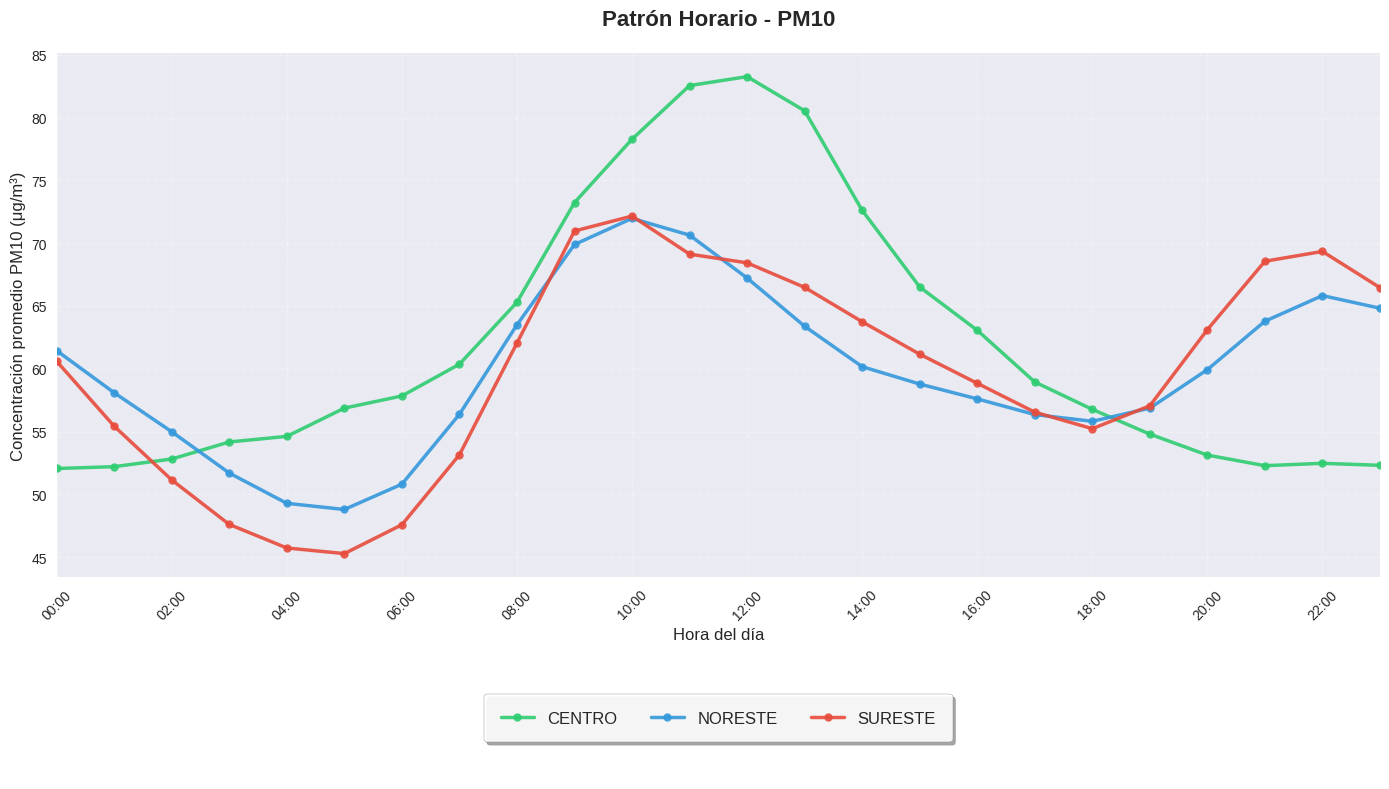

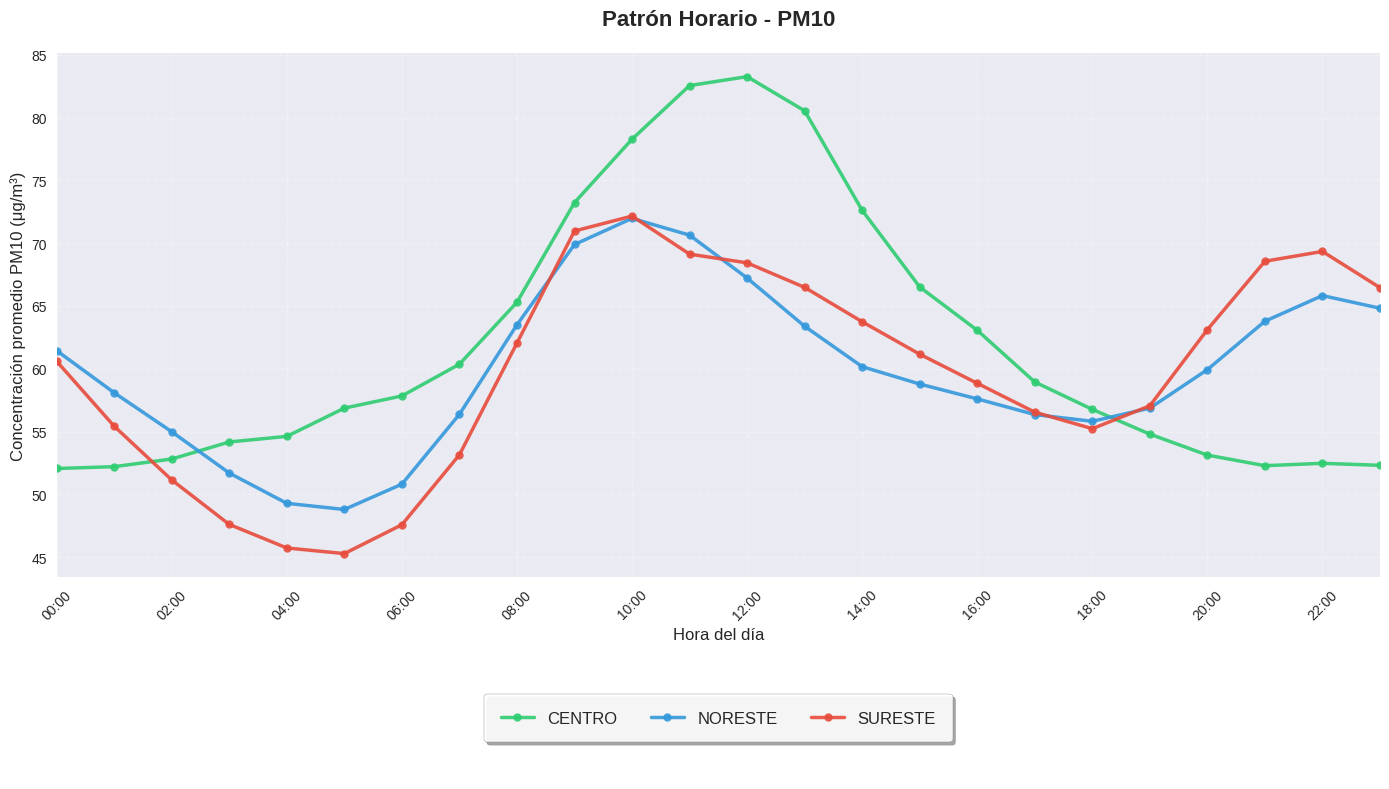

In [9]:
df = pd.read_csv('data/processed/master_table.csv')
df['date_index'] = pd.to_datetime(df['date_index'])

# 2. Arreglar el gráfico
arreglar_patron_horario_actual(df)